In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_dir = "/content/drive/MyDrive/ILoveMusic"

In [ ]:
%pip install -r /content/drive/MyDrive/ILoveMusic/requirements.txt

In [2]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.image import resize

In [ ]:
#visualize a random audio from dataset
visualise_file="/content/drive/MyDrive/ILoveMusic/classical.00001.wav"

In [ ]:
#loading through librosa y=axis and sr=s
y, sr= librosa.load(visualise_file, sr=44100)
plt.figure(figsize=(10,5))
librosa.display.waveshow(y,sr=sr)

In [ ]:
y.shape

In [ ]:
#to play sound
from IPython.display import Audio
Audio(data=y, rate=sr)

In [ ]:
#visualise on chunks of audio
audio_path="./classical.00001.wav"
y, sr= librosa.load(visualise_file,sr=None) #none means to keep original sr

#defining the duration of chunk and overlap
chunk_duration= 4
overlap_duration= 2

#convert duration to sample
chunk_samples= chunk_duration * sr
overlap_samples= overlap_duration * sr

#how many chunks exists in this 30 sec?
num_chunks= int(np.ceil((len(y)-chunk_samples)/(chunk_samples - overlap_samples)))+1

#now iterating to each chunk
for i in range(num_chunks):
    #calc start and end indices of that chunk
    start= i*(chunk_samples - overlap_samples)
    end= start + chunk_samples
    #extract chunk audio
    chunk=y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()

In [ ]:
#mel-spectogram visualization

#for entire 30sec audio
def plot_melspec(y,sr):
    #compute spectogram
    spectrogram=librosa.feature.melspectrogram(y=y,sr=sr)
    #now convert to decibals(log scale)
    spectrogram_db=librosa.power_to_db(spectrogram, ref=np.max)
    #visualize the spec
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
    plt.colorbar(format='%2.0f dB')
    plt.title("This is spectrogram")
    plt.tight_layout()
    plt.show()

In [ ]:
visualise_file="/content/drive/MyDrive/ILoveMusic/classical.00001.wav"
y, sr= librosa.load(visualise_file, sr=44100)

In [ ]:
plot_melspec(y,sr)

In [ ]:
#mel for chunks
def plot_melspec_chunks(y, sr):
    #defining the duration of chunk and overlap
    chunk_duration= 4
    overlap_duration= 2

    #convert duration to sample
    chunk_samples= chunk_duration * sr
    overlap_samples= overlap_duration * sr

    #how many chunks exists in this 30 sec?
    num_chunks= int(np.ceil((len(y)-chunk_samples)/(chunk_samples - overlap_samples)))+1

    #now iterating to each chunk
    for i in range(num_chunks):
        #calc start and end indices of that chunk
        start= i*(chunk_samples - overlap_samples)
        end= start + chunk_samples
        #extract chunk audio
        chunk=y[start:end]
        #melspec part
        spectrogram=librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(spectrogram.shape)
        spectrogram_db=librosa.power_to_db(spectrogram, ref=np.max)
        #Visualize the spec
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectrogram_db,sr=sr,x_axis='time',y_axis='mel')
        plt.colorbar(format='%2.0f dB')
        plt.title("This is spectrogram")
        plt.tight_layout()
        plt.show()

In [ ]:
visualise_file="/content/drive/MyDrive/ILoveMusic/classical.00001.wav"
y, sr= librosa.load(visualise_file, sr=44100)

(128, 345)


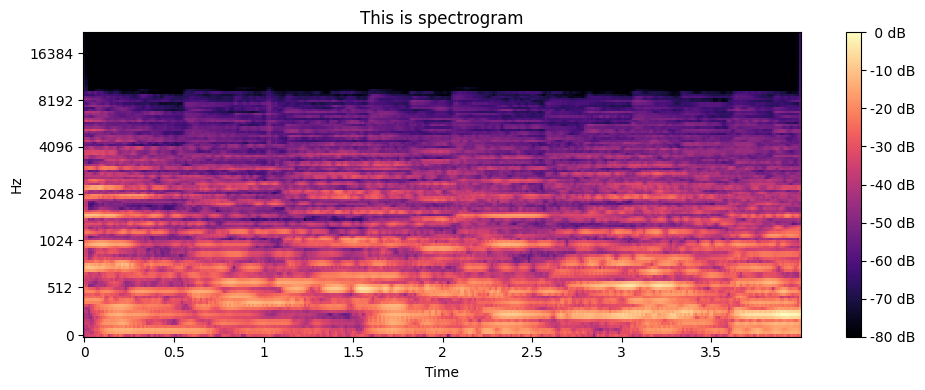

(128, 345)


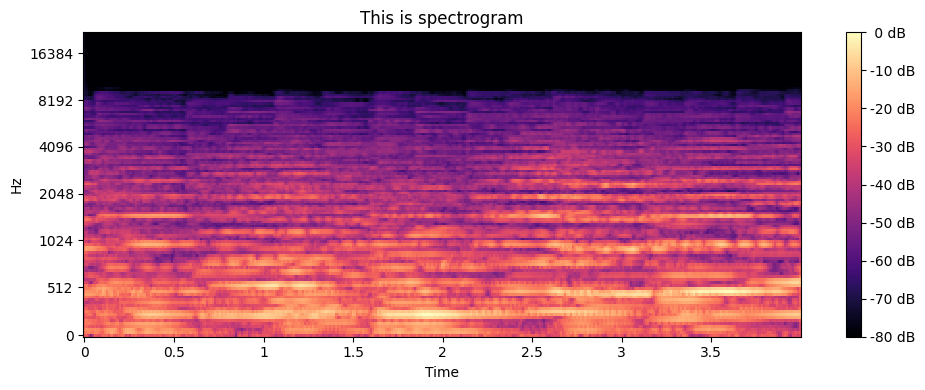

(128, 345)


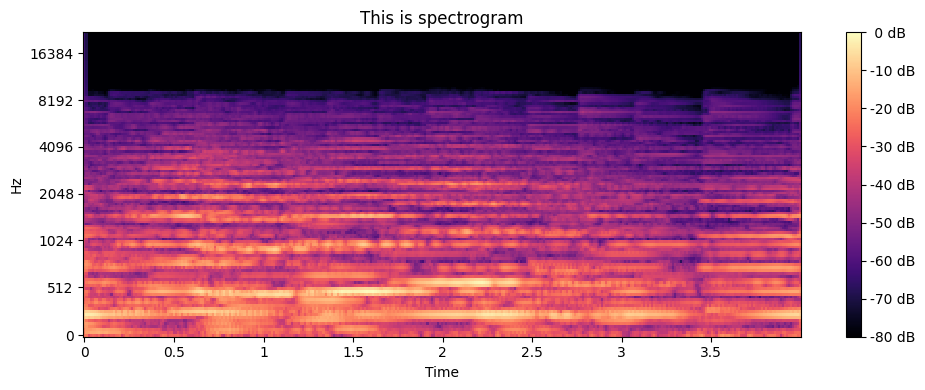

(128, 345)


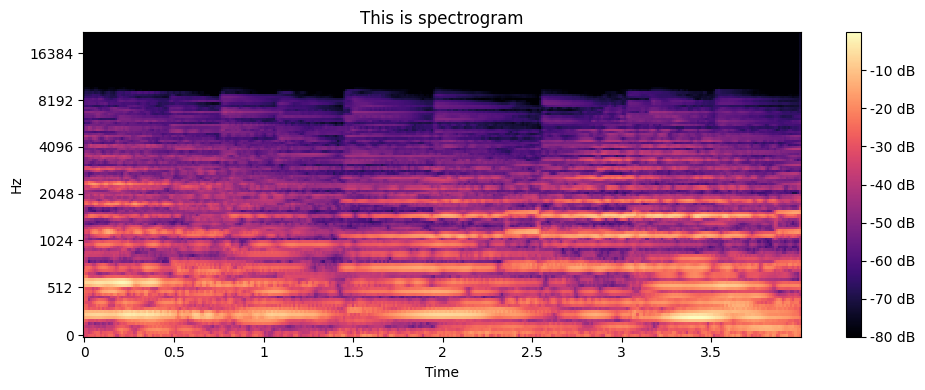

(128, 345)


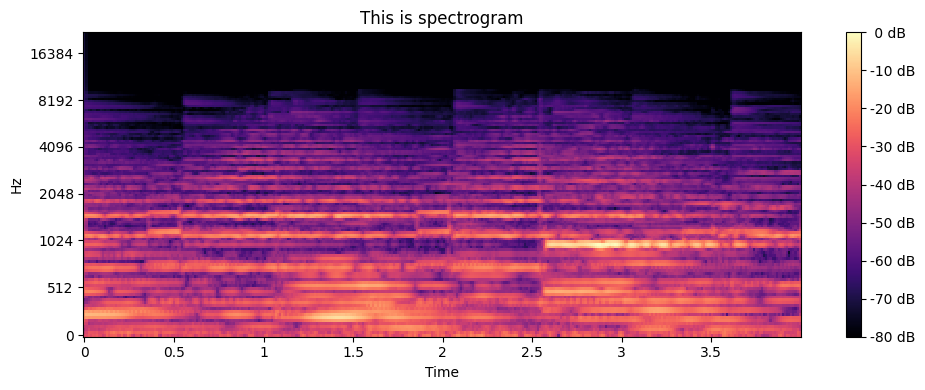

(128, 345)


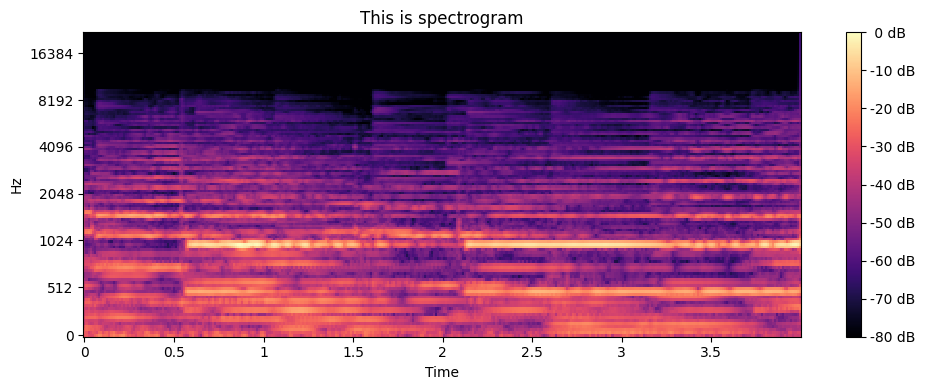

(128, 345)


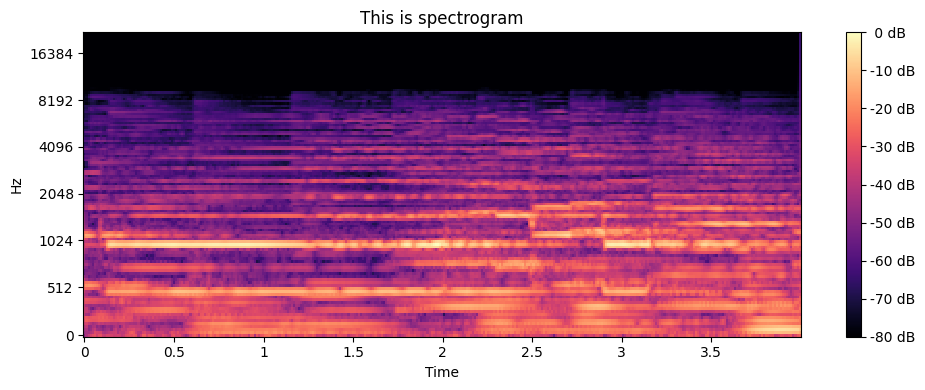

(128, 345)


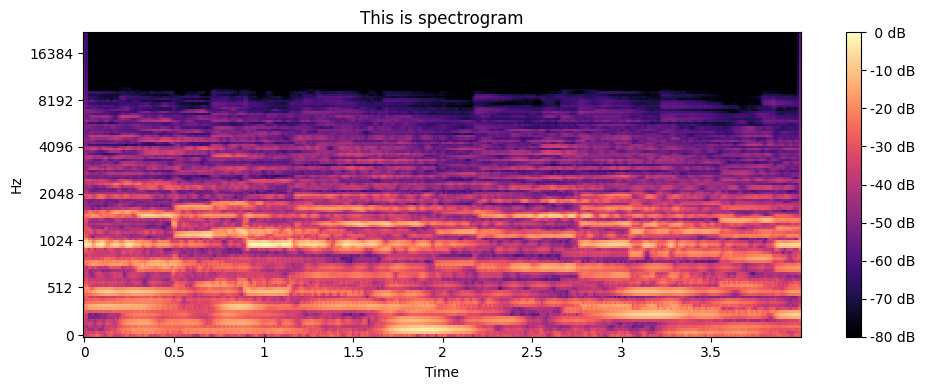

(128, 345)


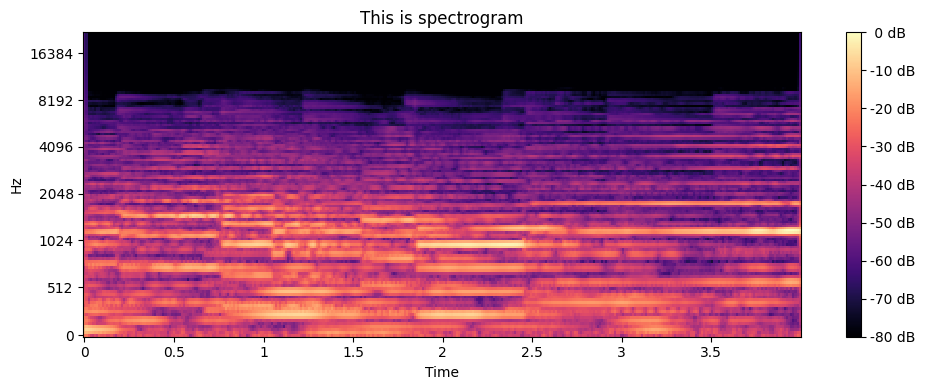

(128, 345)


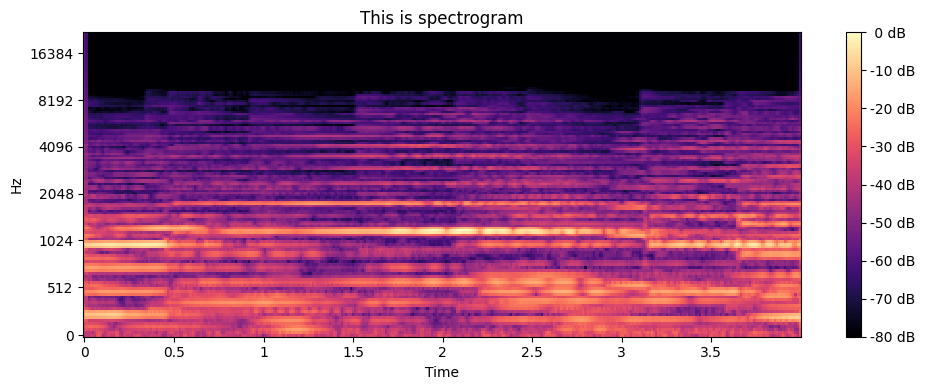

(128, 345)


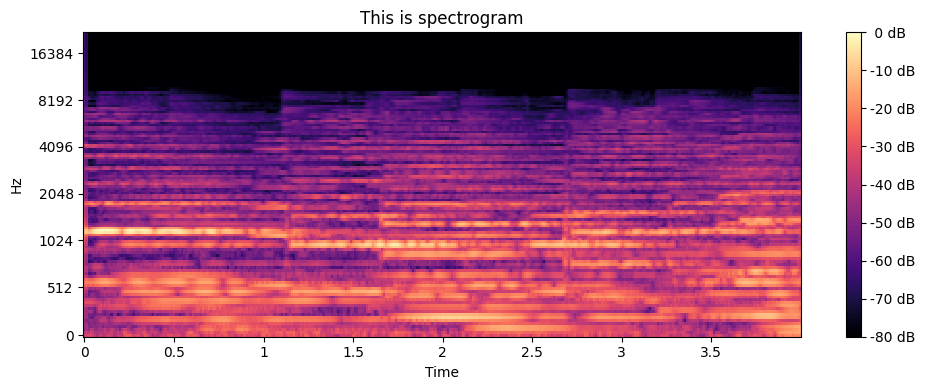

(128, 345)


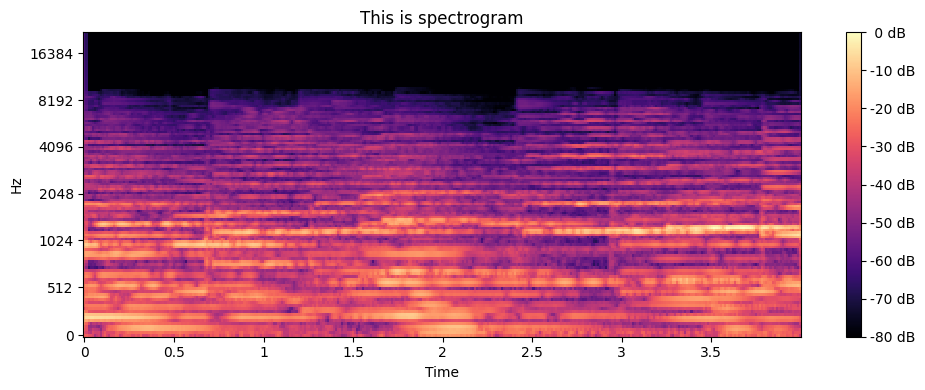

(128, 345)


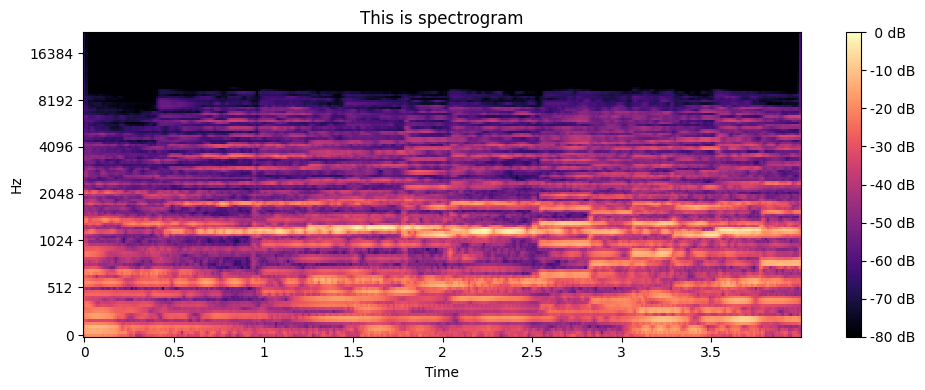

(128, 345)


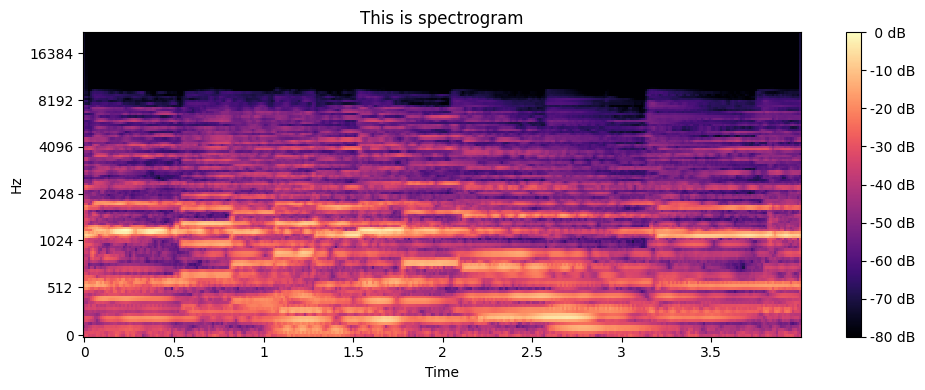

(128, 174)


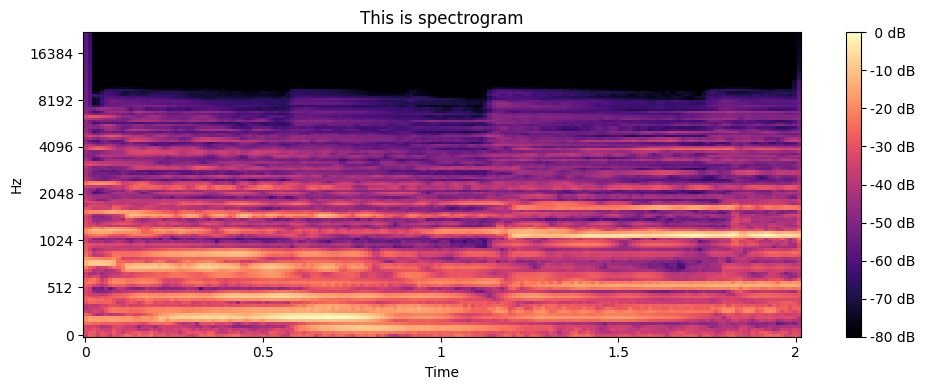

In [ ]:
plot_melspec_chunks(y,sr)

In [ ]:
#(128, 345) is the shape of the mel spec generated above.
128*345

**BEGIN PREPROCESSING**

In [3]:
#This is now the final data preprocessing
data_dir= "/content/drive/MyDrive/ILoveMusic/GTZAN/genres_original"
classes= ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [ ]:
#now lets load the dataset and preprocess the audios
def load_and_preprocess(data_dir,classes,target_shape=(64, 64)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir= os.path.join(data_dir,class_name) #joins the folders and creates path
        print("The genre being preprocessed rn", class_name)
        for filename in os.listdir(class_dir): #gives lists of files inside this dir
            if filename.endswith('.wav'):
                file_path= os.path.join(class_dir,filename)
                audio_data,sample_rate= librosa.load(file_path,sr=None)

                #Performing the preprocessing here
                #defining the duration of chunk and overlap
                chunk_duration= 4
                overlap_duration= 2

                #convert duration to sample
                chunk_samples= chunk_duration * sample_rate
                overlap_samples= overlap_duration * sample_rate

                #how many chunks exists in this 30 sec?
                num_chunks= int(np.ceil((len(audio_data)-chunk_samples)/(chunk_samples - overlap_samples)))+1

                #now iterating to each chunk
                for i in range(num_chunks):
                    #calc start and end indices of that chunk
                    start= i*(chunk_samples - overlap_samples)
                    end= start + chunk_samples
                    #extract chunk audio
                    chunk=audio_data[start:end]
                    #melspec part
                    mel_spectrogram=librosa.feature.melspectrogram(y=chunk,sr=sample_rate) #this is matrix that contains all feature
                    #mel_spectrogram_db=librosa.power_to_db(spectrogram, ref=np.max); no need for this since only to see axis value

                    #resize the matrix based on the provided target shape and to know it  print the shape of spec
                    mel_spectrogram= resize(np.expand_dims(mel_spectrogram,axis=-1),target_shape)  #got from doc where it expands shape of an array
                    #now append the data to list
                    data.append(mel_spectrogram)
                    labels.append(i_class)    #starts reading from 0th index
    return np.array(data),np.array(labels)    #np.array means converting the list to numpy array or typecasting to the array
    print("Completed preprocessing.")


In [ ]:
#preprocess the data
data, labels = load_and_preprocess(data_dir, classes)    #we get 15 mel for each audio file

#saving the preprocessed data and labels as .npy files
np.save('preprocessed_data2.npy', data)
print("And we have successfully saved preprocessed data!")

The genre being preprocessed rn blues
The genre being preprocessed rn classical
The genre being preprocessed rn country
The genre being preprocessed rn disco
The genre being preprocessed rn hiphop
The genre being preprocessed rn jazz
The genre being preprocessed rn metal
The genre being preprocessed rn pop
The genre being preprocessed rn reggae
The genre being preprocessed rn rock
And we have successfully saved preprocessed data!


In [ ]:
#saving the preprocessed data and labels as .npy files
np.save('preprocessed_data2.npy', data)
print("And we have successfully saved preprocessed data!")

And we have successfully saved preprocessed data!


In [ ]:
data.shape

(14975, 64, 64, 1)

In [ ]:
labels.shape

(14975, 10)

In [ ]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
#now lets perform one-hot encoding where labels are converted to it for future use
from tensorflow.keras.utils import to_categorical
labels= to_categorical(labels,num_classes=len(classes))  #takes label and num_classes takes length of the class list

np.save('preprocessed_labels2.npy', labels)
print("Preprocessed one-hot encoded labels saved successfully!")

Preprocessed one-hot encoded labels saved successfully!


In [ ]:
#now lets check how the array looks
labels       #for aeach training example, if it is in 1st class then first entry becomes one rest zero and so on....


array([[[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       [[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0.

**Load the Preprocessed data**

In [4]:
#loading the preprocessed data and labels
data = np.load('/content/drive/MyDrive/Colab Notebooks/preprocessed_data2.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/preprocessed_labels2.npy')

print("Preprocessed data loaded successfully!")

Preprocessed data loaded successfully!


In [5]:
labels.shape

(14975, 10)

**Splitting into train and test**

In [5]:
#splitting of data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(data,labels,test_size=0.2,random_state=42)   #data argument goes to X and labels to Y and random_state means that it will take the same pattern if we run the cell again

In [ ]:
#normalize input data
# X_train = X_train / 255.0
# X_test = X_test / 255.0

In [6]:
# batch_size = 64
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(len(X_train)).batch(batch_size)
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(batch_size)

#to create tf datasets for efficient batching
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(batch_size)

In [8]:
X_train.shape

(11980, 64, 64, 1)

In [9]:
X_test.shape

(2995, 64, 64, 1)

In [10]:
Y_train.shape

(11980, 10)

In [7]:
Y_test.shape

(2995, 10)

**Now We are ready to build the architecture CNN:**

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/ILoveMusic')

In [8]:
class CNNModel:
    def __init__(self, input_shape, num_classes):
        stddev = 0.01  #this is standard deviation for weight initialization

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.weights = {
            'conv1': tf.Variable(tf.random.normal([3, 3, input_shape[-1], 32], stddev=stddev)),
            'conv2': tf.Variable(tf.random.normal([3, 3, 32, 32], stddev=stddev)),
            'conv3': tf.Variable(tf.random.normal([3, 3, 32, 64], stddev=stddev)),
            'conv4': tf.Variable(tf.random.normal([3, 3, 64, 64], stddev=stddev)),
            'conv5': tf.Variable(tf.random.normal([3, 3, 64, 128], stddev=stddev)),
            'conv6': tf.Variable(tf.random.normal([3, 3, 128, 128], stddev=stddev)),
            #since fully connected layer weights will be initialized later based on computed size
            'fc1': None,
            'fc2': tf.Variable(tf.random.normal([1200, num_classes], stddev=stddev))
        }
        self.biases = {
            'conv1': tf.Variable(tf.zeros([32])),
            'conv2': tf.Variable(tf.zeros([32])),
            'conv3': tf.Variable(tf.zeros([64])),
            'conv4': tf.Variable(tf.zeros([64])),
            'conv5': tf.Variable(tf.zeros([128])),
            'conv6': tf.Variable(tf.zeros([128])),
            'fc1': None,
            'fc2': tf.Variable(tf.zeros([num_classes]))
        }

    def build_fc1(self, x):
        #to dynamically calculate the flattened size
        flatten_dim = np.prod(x.shape[1:])  # Total size after flattening
        self.weights['fc1'] = tf.Variable(tf.random.normal([flatten_dim, 1200], stddev=0.01))
        self.biases['fc1'] = tf.Variable(tf.zeros([1200]))

    def forward(self, x, is_training=True):
        #convolutional layers with ReLU, Max Pooling, and Dropout
        x = tf.nn.conv2d(x, self.weights['conv1'], strides=1, padding='SAME') + self.biases['conv1']
        x = tf.nn.relu(x)
        x = tf.nn.conv2d(x, self.weights['conv2'], strides=1, padding='VALID') + self.biases['conv2']
        x = tf.nn.relu(x)
        x = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='SAME')

        x = tf.nn.conv2d(x, self.weights['conv3'], strides=1, padding='SAME') + self.biases['conv3']
        x = tf.nn.relu(x)
        x = tf.nn.conv2d(x, self.weights['conv4'], strides=1, padding='VALID') + self.biases['conv4']
        x = tf.nn.relu(x)
        x = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='SAME')

        x = tf.nn.conv2d(x, self.weights['conv5'], strides=1, padding='SAME') + self.biases['conv5']
        x = tf.nn.relu(x)
        x = tf.nn.conv2d(x, self.weights['conv6'], strides=1, padding='VALID') + self.biases['conv6']
        x = tf.nn.relu(x)
        x = tf.nn.max_pool2d(x, ksize=2, strides=2, padding='SAME')

        if is_training:
            x = tf.nn.dropout(x, rate=0.3)

        #flatten
        x = tf.reshape(x, [x.shape[0], -1])

        #initialize fully connected layer weights if not already done
        if self.weights['fc1'] is None:
            self.build_fc1(x)

        #fully connected layers
        x = tf.matmul(x, self.weights['fc1']) + self.biases['fc1']
        x = tf.nn.relu(x)

        if is_training:
            x = tf.nn.dropout(x, rate=0.4)

        x = tf.matmul(x, self.weights['fc2']) + self.biases['fc2']
        return x  #return raw logits


    def summary(self):
        print(f"{'Layer':<15}{'Output Shape':<25}{'Param #':<15}")
        print("=" * 55)
        total_params = 0

        #convolutional layers
        for i in range(1, 7):
            weight = self.weights[f'conv{i}']
            bias = self.biases[f'conv{i}']
            params = np.prod(weight.shape) + np.prod(bias.shape)
            total_params += params
            output_shape = f"(, , , {weight.shape[-1]})"
            print(f"conv{i:<12} {output_shape:<25} {params:<15}")

        #fully connected layers
        if self.weights['fc1'] is not None:
            fc1_weights = self.weights['fc1']
            fc1_biases = self.biases['fc1']
            fc1_params = np.prod(fc1_weights.shape) + np.prod(fc1_biases.shape)
            total_params += fc1_params
            print(f"fc1{'':<12} (1200)<25 {fc1_params:<15}")

        fc2_weights = self.weights['fc2']
        fc2_biases = self.biases['fc2']
        fc2_params = np.prod(fc2_weights.shape) + np.prod(fc2_biases.shape)
        total_params += fc2_params
        print(f"fc2{'':<12} ({self.num_classes})<25 {fc2_params:<15}")

        print("=" * 55)
        print(f"Total params: {total_params}")
        print(f"Trainable params: {total_params}")
        print(f"Non-trainable params: 0")

In [9]:
#to define the custom loss and accuracy functions
@tf.function
def compute_loss(logits, labels):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))

@tf.function
def compute_accuracy(logits, labels):
    predictions = tf.argmax(logits, axis=1)
    labels = tf.argmax(labels, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, labels), tf.float32))
    return accuracy

#training step function
@tf.function
def train_step(model, optimizer, x_batch, y_batch):
    with tf.GradientTape() as tape:
        logits = model.forward(x_batch, is_training=True)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_batch, logits=logits))

    #here we collect trainable variables manually
    trainable_variables = list(model.weights.values()) + list(model.biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss

In [10]:
input_shape = (64,64,1)  
num_classes = 10 

In [13]:
X_train[0].shape

(64, 64, 1)

In [11]:
#initialize the model and optimizer
model = CNNModel(input_shape=X_train.shape[1:], num_classes=Y_train.shape[1])
optimizer = tf.optimizers.Adam(learning_rate=0.0001)

In [12]:
Y_train.shape

(11980, 10)

In [13]:
import json

#we create a dictionary to track training history
training_history = {"loss": [], "val_loss": [], "accuracy": [], "val_accuracy": []}

#training loop
num_epochs = 37
for epoch in range(num_epochs):
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    batch_count = 0

    for x_batch, y_batch in train_dataset:
        batch_loss = train_step(model, optimizer, x_batch, y_batch)
        epoch_loss += batch_loss
        batch_count += 1

    if batch_count > 0:
        epoch_loss /= batch_count

    #compute accuracy on training data
    epoch_accuracy = 0.0
    for x_batch, y_batch in train_dataset:
        logits = model.forward(x_batch, is_training=False)
        accuracy = compute_accuracy(logits, y_batch)
        epoch_accuracy += accuracy

    if batch_count > 0:
        epoch_accuracy /= batch_count

    #calculate average loss and accuracy for the epoch
    avg_loss = epoch_loss.numpy() if hasattr(epoch_loss, 'numpy') else epoch_loss
    avg_accuracy = epoch_accuracy.numpy() if hasattr(epoch_accuracy, 'numpy') else epoch_accuracy

    print(f"Epoch {epoch + 1}: Loss = {avg_loss:.4f}, Accuracy = {avg_accuracy:.4%}")

    #validation step
    test_loss = 0.0
    test_accuracy = 0.0
    test_batch_count = 0

    for x_batch, y_batch in test_dataset:
        logits = model.forward(x_batch, is_training=False)
        loss = compute_loss(logits, y_batch)
        accuracy = compute_accuracy(logits, y_batch)

        test_loss += loss
        test_accuracy += accuracy
        test_batch_count += 1

    if test_batch_count > 0:
        test_loss /= test_batch_count
        test_accuracy /= test_batch_count

    #save metrics to history
    training_history["loss"].append(float(avg_loss))  # Ensure it's a float
    training_history["accuracy"].append(float(avg_accuracy))  # Ensure it's a float
    training_history["val_loss"].append(float(test_loss))  # Ensure it's a float
    training_history["val_accuracy"].append(float(test_accuracy))  # Ensure it's a float

    print(f"Validation: Loss = {test_loss:.4f}, Accuracy = {test_accuracy:.4%}")

#function to recursively convert all tensors to native python types
def convert_tensor_to_native(obj):
    if isinstance(obj, dict):
        return {key: convert_tensor_to_native(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_tensor_to_native(item) for item in obj]
    elif hasattr(obj, 'numpy'):
        return obj.numpy().item()  #convert EagerTensor to native Python scalar
    else:
        return obj

#convert the training history dictionary
training_history_native = convert_tensor_to_native(training_history)

Epoch 1: Loss = 1.9185, Accuracy = 45.0444%
Validation: Loss = 1.6456, Accuracy = 44.4306%
Epoch 2: Loss = 1.5117, Accuracy = 53.1444%
Validation: Loss = 1.4006, Accuracy = 53.6202%
Epoch 3: Loss = 1.3167, Accuracy = 59.0083%
Validation: Loss = 1.2374, Accuracy = 57.9315%
Epoch 4: Loss = 1.1787, Accuracy = 63.1306%
Validation: Loss = 1.1429, Accuracy = 61.4222%
Epoch 5: Loss = 1.0653, Accuracy = 67.1278%
Validation: Loss = 1.0527, Accuracy = 64.8254%
Epoch 6: Loss = 0.9721, Accuracy = 69.5806%
Validation: Loss = 0.9877, Accuracy = 66.8533%
Epoch 7: Loss = 0.8912, Accuracy = 72.9639%
Validation: Loss = 0.9163, Accuracy = 69.7456%
Epoch 8: Loss = 0.8201, Accuracy = 75.5194%
Validation: Loss = 0.8621, Accuracy = 71.1086%
Epoch 9: Loss = 0.7481, Accuracy = 77.6528%
Validation: Loss = 0.8063, Accuracy = 73.2923%
Epoch 10: Loss = 0.6851, Accuracy = 79.1361%
Validation: Loss = 0.7945, Accuracy = 73.3588%
Epoch 11: Loss = 0.6309, Accuracy = 80.9583%
Validation: Loss = 0.7445, Accuracy = 75.098

In [14]:
model.summary()

Layer          Output Shape             Param #        
conv1            (, , , 32)                320            
conv2            (, , , 32)                9248           
conv3            (, , , 64)                18496          
conv4            (, , , 64)                36928          
conv5            (, , , 128)               73856          
conv6            (, , , 128)               147584         
fc1             (1200)<25 7527600        
fc2             (10)<25 12010          
Total params: 7826042
Trainable params: 7826042
Non-trainable params: 0


In [15]:
#to save training history to a JSON file
training_file = "training_history_final.json"
with open(training_file, "w") as f:
    json.dump(training_history, f)

print(f"Training history saved to {training_file}")

Training history saved to training_history_final.json


In [ ]:
import json
#load training history from JSON
training_file = "/content/drive/MyDrive/Colab Notebooks/ktraining_history.json"
with open(training_file, "r") as f:
    loaded_history = json.load(f)

print(loaded_history)

{'accuracy': [0.3121035099029541, 0.5041736364364624, 0.588647723197937, 0.6481636166572571, 0.6900667548179626, 0.735308825969696, 0.7690317034721375, 0.7939065098762512, 0.8232053518295288, 0.8398163318634033, 0.8610183596611023, 0.875292181968689, 0.8909849524497986, 0.9000834822654724, 0.9076794385910034, 0.9188647866249084, 0.928631067276001, 0.9353088736534119, 0.9375625848770142, 0.9428213834762573, 0.9473288655281067, 0.9510851502418518, 0.9543405771255493, 0.960767924785614, 0.961519181728363, 0.9666110277175903, 0.9696160554885864, 0.9640233516693115, 0.9726210236549377, 0.9690316915512085, 0.9692821502685547, 0.9703672528266907, 0.9758764505386353, 0.9779632687568665, 0.9722036719322205, 0.977712869644165, 0.9799666404724121], 'loss': [2.000962018966675, 1.4277929067611694, 1.1936495304107666, 1.0291467905044556, 0.9064530730247498, 0.7794788479804993, 0.6903617978096008, 0.6056089401245117, 0.53802889585495, 0.47438088059425354, 0.42332667112350464, 0.37595516443252563, 0.3

In [16]:
save_dir = "./model_backup_final/saved_model_final"
#forfuture use loading weights and biases
def load_model_weights(model, save_dir):

    for name, variable in model.weights.items():
        model.weights[name] = tf.convert_to_tensor(np.load(os.path.join(save_dir, f"{name}_weights.npy")))
    for name, variable in model.biases.items():
        model.biases[name] = tf.convert_to_tensor(np.load(os.path.join(save_dir, f"{name}_biases.npy")))

    for name, variable in model.weights.items():
        print(f"Loaded weight {name}: {variable.shape}")
    for name, variable in model.biases.items():
        print(f"Loaded bias {name}: {variable.shape}")

Model saved at: ./saved_model_final


In [ ]:
#to save the model in zip
from google.colab import files
!zip -r model_backup_final.zip saved_model_final/
files.download("model_backup_final.zip")

# Model evaluation on Training **set**

In [20]:
#Evaluate the model on a dataset.
def evaluate_model(model, dataset, loss_fn, compute_accuracy_fn):
    total_loss = 0.0
    total_accuracy = 0.0
    num_batches = 0

    for x_batch, y_batch in dataset:  #a tf dataset or iterable of (inputs, labels).
        logits = model.forward(x_batch, is_training=False)  # Forward pass
        loss = loss_fn(logits, y_batch)  #this func computes loss
        accuracy = compute_accuracy_fn(logits, y_batch)  #this func compute accuracy

        total_loss += loss.numpy()
        total_accuracy += accuracy
        num_batches += 1

    avg_loss = total_loss / num_batches  #calc average loss over the dataset.
    avg_accuracy = total_accuracy / num_batches  #calc a verage accuracy over the dataset.

    return avg_loss, avg_accuracy

In [22]:
train_loss, train_accuracy = evaluate_model(model, train_dataset, compute_loss, compute_accuracy)
print(f"This the training loss: {train_loss:.4f}, with training accuracy: {train_accuracy:.4f}")

val_loss, val_accuracy = evaluate_model(model, test_dataset, compute_loss, compute_accuracy)
print(f"This the validation loss: {val_loss:.4f}, with validation accuracy: {val_accuracy:.4f}")

This the training loss: 0.0361, with training accuracy: 0.9908
This the validation loss: 0.5891, with validation accuracy: 0.8557


# Accuracy and Loss Visualization

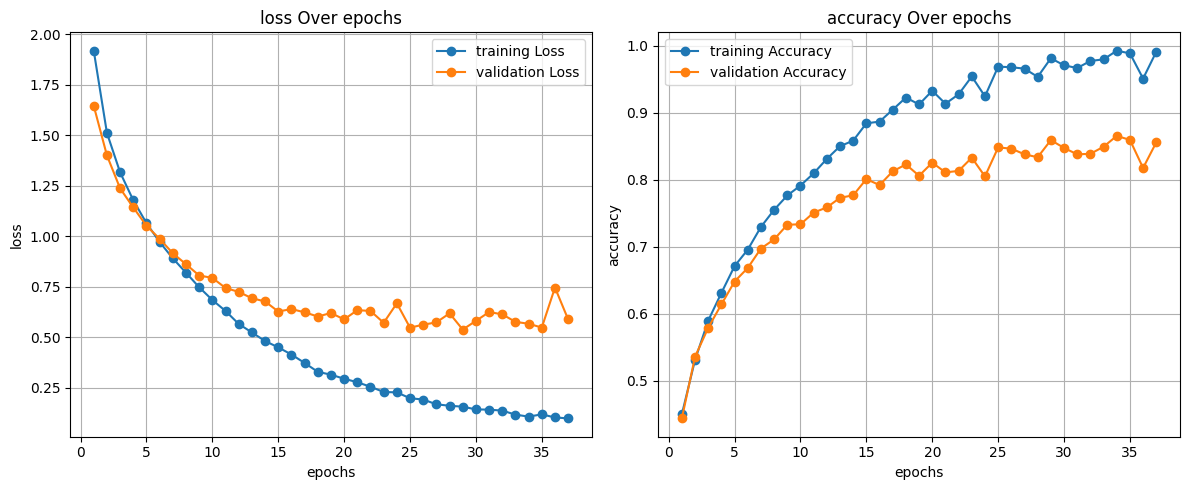

In [24]:
#since we have training_history as a dictionary with keys 'loss', 'val_loss', 'accuracy', 'val_accuracy'.
def plot_training_history(training_history):
    epochs = range(1, len(training_history['loss']) + 1)

    #to plot Loss
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_history['loss'], label='training Loss', marker='o')
    plt.plot(epochs, training_history['val_loss'], label='validation Loss', marker='o')
    plt.title('loss Over epochs')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.grid()

    #to plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, training_history['accuracy'], label='training Accuracy', marker='o')
    plt.plot(epochs, training_history['val_accuracy'], label='validation Accuracy', marker='o')
    plt.title('accuracy Over epochs')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

#now we call the function
plot_training_history(training_history)


# Precision,Recall,Confusion Matrix - Model Evaluation-II

In [25]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

In [26]:
def get_predictions_and_labels(model, dataset):
    predictions = []
    true_labels = []

    for x_batch, y_batch in dataset:
        logits = model.forward(x_batch, is_training=False)
        batch_predictions = tf.argmax(logits, axis=1).numpy()
        batch_labels = tf.argmax(y_batch, axis=1).numpy()

        predictions.extend(batch_predictions)
        true_labels.extend(batch_labels)

    return np.array(predictions), np.array(true_labels)

In [28]:
from sklearn.metrics import f1_score
#get predictions and labels
predictions, true_labels = get_predictions_and_labels(model, test_dataset)

#precision and Recall
precision = precision_score(true_labels, predictions, average="weighted")
recall = recall_score(true_labels, predictions, average="weighted")
f1 = f1_score(true_labels, predictions, average="weighted")

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Precision: 0.8593
Recall: 0.8551
F1 Score: 0.8559
Confusion Matrix:
[[248   1  24   2   2  12   0   0   7   6]
 [  1 268   1   1   0  25   0   0   1   1]
 [  8   2 261   8   1  12   1   4   2  18]
 [  3   1   1 283   5   1   0   3   9   6]
 [  3   0   1   8 237   3   6   5  11   3]
 [  8   8  17   2   0 273   0   0   2   1]
 [  3   0   2   3   1   0 280   0   1  12]
 [  0   1  11  15   2   7   0 238   6   9]
 [  6   3  10  10   1   4   0   2 255   5]
 [  6   5  23  14   2   7   6   4   6 218]]


# Confusion Matrix Visualization

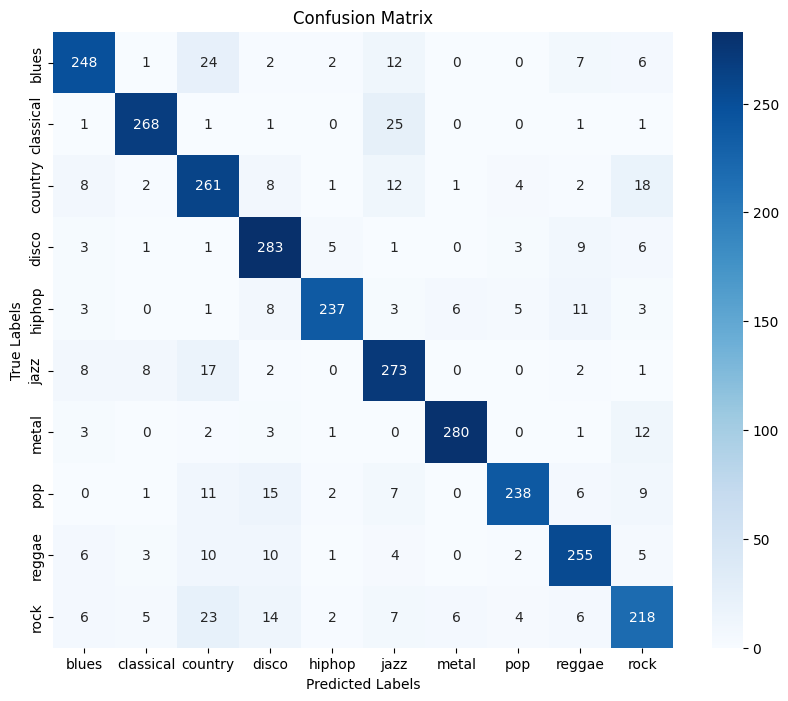

In [29]:
#we now plot a confusion matrix with labels on basis of true and predicted ones 
def plot_confusion_matrix(conf_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Define class names (replace with your actual class names)
class_names = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, class_names)

## Print out the targeted and predicted labels

In [30]:
# def get_predictions_and_labels(model, dataset):
#     predictions = []
#     true_labels = []

#     for x_batch, y_batch in dataset:
#         logits = model.forward(x_batch, is_training=False)
#         batch_predictions = tf.argmax(logits, axis=1).numpy()  # Predicted class
#         batch_true_labels = tf.argmax(y_batch, axis=1).numpy()  # True class

#         predictions.extend(batch_predictions)
#         true_labels.extend(batch_true_labels)

#     return predictions, true_labels

In [32]:
#first, map numerical labels to class names
true_labels_named = [class_names[label] for label in true_labels]
predictions_named = [class_names[label] for label in predictions]

print("Lets compare the targeted and predicted labels:")
for true_label, predicted_label in zip(true_labels_named, predictions_named):
    print(f"Targeted Labels: {true_label:<10} Predicted Labels: {predicted_label:<10}")

Lets compare the targeted and predicted labels:
Targeted Labels: pop        Predicted Labels: pop       
Targeted Labels: metal      Predicted Labels: metal     
Targeted Labels: metal      Predicted Labels: metal     
Targeted Labels: disco      Predicted Labels: disco     
Targeted Labels: hiphop     Predicted Labels: hiphop    
Targeted Labels: hiphop     Predicted Labels: hiphop    
Targeted Labels: metal      Predicted Labels: metal     
Targeted Labels: country    Predicted Labels: country   
Targeted Labels: pop        Predicted Labels: pop       
Targeted Labels: blues      Predicted Labels: blues     
Targeted Labels: reggae     Predicted Labels: reggae    
Targeted Labels: blues      Predicted Labels: blues     
Targeted Labels: reggae     Predicted Labels: reggae    
Targeted Labels: country    Predicted Labels: country   
Targeted Labels: classical  Predicted Labels: classical 
Targeted Labels: pop        Predicted Labels: pop       
Targeted Labels: blues      Predicted La

# Lets test with test input

In [33]:
#load and preprocess audio data
def load_and_preprocess_file(file_path, target_shape=(64,64)):
    data = []
    audio_data, sample_rate = librosa.load(file_path, sr=None)

    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds

    chunk_samples = chunk_duration * sample_rate
    overlap_samples = overlap_duration * sample_rate

    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    for i in range(num_chunks):

        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        chunk = audio_data[start:end]

        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
        data.append(mel_spectrogram)

    return np.array(data)

In [34]:
file_path = "/content/drive/MyDrive/Colab Notebooks/test_music/hiphop.00003.wav"
X_test=load_and_preprocess_file(file_path)

In [35]:
X_test.shape

(15, 64, 64, 1)

In [36]:
def model_prediction(model, X_test):
    #to forward pass through the model
    logits = model.forward(X_test, is_training=False)

    #then coompute probabilities using softmax
    probabilities = tf.nn.softmax(logits, axis=1).numpy()

    #to predict categories (argmax of probabilities)
    predicted_categories = np.argmax(probabilities, axis=1)

    #to get unique elements and their counts
    unique_elements, counts = np.unique(predicted_categories, return_counts=True)

    #this dtermine the most frequent predicted category
    max_count = np.max(counts)
    max_elements = unique_elements[counts == max_count]

    return max_elements[0]

In [37]:
predicted_genre = model_prediction(model, X_test)
print(f"The predicted genre is: {predicted_genre}",classes[predicted_genre])

The predicted genre is: 4 hiphop
